<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Algoritmos/SMV/4_2_5_SVMRandom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lectura de datos

1.- Se necesita obtener todos los conjuntos necesarios para implementar el clasificador

In [ ]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

setInicial=pd.read_csv('Vinos.csv')

#Dividir el conjunto en datos y clase
inicialDatos=setInicial.drop('quality', axis=1)
#inicialClase=setInicial.pop('quality') #clase
inicialClase=setInicial['quality'] #clase

#Cada que se ejecuta esta función el conjunto de datos resultante es distinto
entrenamientoDatos, evaluacionDatos,entrenamientoClase,evaluacionClase=\
train_test_split(inicialDatos, inicialClase,test_size=0.3, stratify=inicialClase)

nombresAtributos=entrenamientoDatos.columns.values
print("Atributos: ", nombresAtributos,"\n")

print("Datos de entrenamiento:", entrenamientoClase.value_counts())
print("\nDatos de evaluacion:", evaluacionClase.value_counts())

clase_objetivo='Cat_5'
clases=['Cat_5','Cat_7']

Atributos:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'] 

Datos de entrenamiento: quality
Cat_5    477
Cat_7    139
Name: count, dtype: int64

Datos de evaluacion: quality
Cat_5    204
Cat_7     60
Name: count, dtype: int64


In [29]:
setInicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         880 non-null    float64
 1   volatile acidity      880 non-null    float64
 2   citric acid           880 non-null    float64
 3   residual sugar        880 non-null    float64
 4   chlorides             880 non-null    float64
 5   free sulfur dioxide   880 non-null    float64
 6   total sulfur dioxide  880 non-null    float64
 7   density               880 non-null    float64
 8   pH                    880 non-null    float64
 9   sulphates             880 non-null    float64
 10  alcohol               880 non-null    float64
 11  quality               880 non-null    object 
dtypes: float64(11), object(1)
memory usage: 82.6+ KB


#Clasificadores
##SVM
`SVC`:


In [ ]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import classification_report

################## Clasificador ######################
clasificadorSVM = SVC(kernel='linear')
#kernel:‘linear’, ‘poly’,‘sigmoid’,‘precomputed’ default: ‘rbf’

################## Modelo ###########################
modeloSVM = clasificadorSVM.fit(entrenamientoDatos, entrenamientoClase)
predictSVM=modeloSVM.predict(evaluacionDatos)
predictSVMTrain=modeloSVM.predict(entrenamientoDatos)

print("Vectores de soporte:\n")
print(clasificadorSVM.support_vectors_)

print("Número de vectores por clase: ",clasificadorSVM.n_support_)

reporte=classification_report(evaluacionClase,predictSVM,labels=clases)#output_dict=True)
print(reporte)

Vectores de soporte:

[[ 5.9    0.46   0.    ...  3.5    0.53  11.2  ]
 [ 8.2    0.28   0.6   ...  3.39   0.68  10.6  ]
 [15.6    0.645  0.49  ...  2.92   0.74  11.1  ]
 ...
 [ 7.4    0.25   0.29  ...  3.4    0.76  10.9  ]
 [ 8.1    0.38   0.28  ...  3.23   0.73   9.7  ]
 [ 9.9    0.53   0.57  ...  3.19   0.76  11.6  ]]
Número de vectores por clase:  [95 93]
              precision    recall  f1-score   support

       Cat_5       0.94      0.94      0.94       204
       Cat_7       0.78      0.78      0.78        60

    accuracy                           0.90       264
   macro avg       0.86      0.86      0.86       264
weighted avg       0.90      0.90      0.90       264



## Ramdom forest
Método Ensamble (varios árboles)

RandomForestClassifier(criterion='entropy', n_estimators=80)
              precision    recall  f1-score   support

       Cat_5       0.94      0.97      0.96       204
       Cat_7       0.89      0.80      0.84        60

    accuracy                           0.93       264
   macro avg       0.92      0.89      0.90       264
weighted avg       0.93      0.93      0.93       264



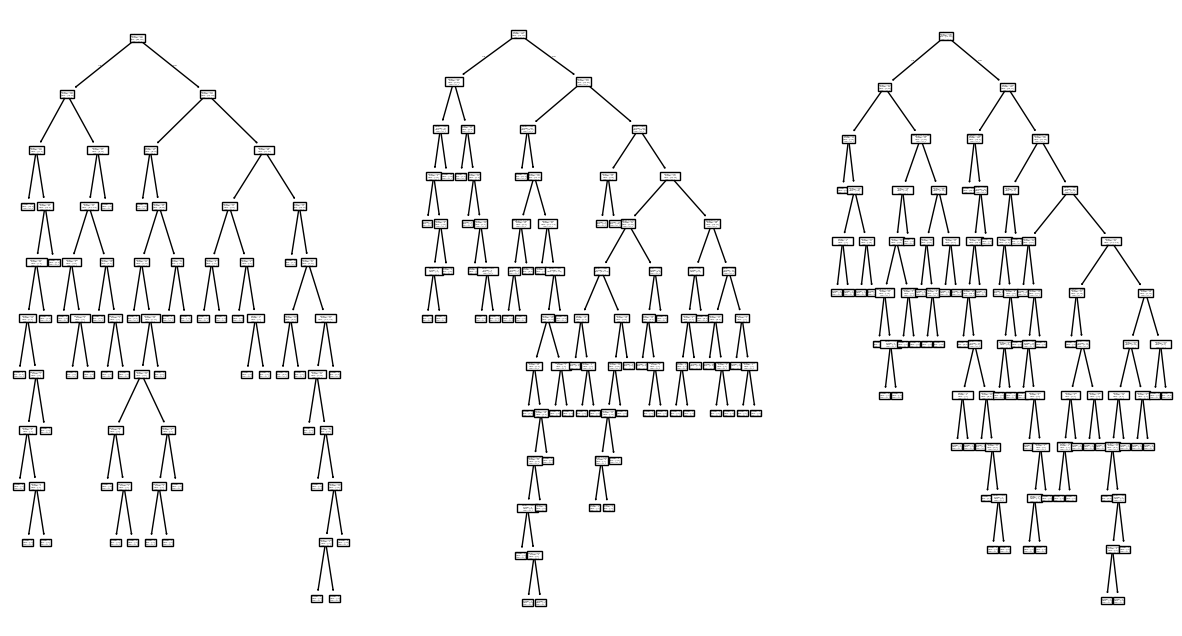

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

## Clasificador
clasificadorRandom= RandomForestClassifier(n_estimators=80, criterion='entropy')

#Parametros
## max_depth
## n_estimators -----> Número de árboles que quiero en el bosque
## criterion=(entropy ó gini)

################# Modelo
modeloRandom=clasificadorRandom.fit(entrenamientoDatos,entrenamientoClase)

print(modeloRandom)

#generar una figura
fig=plt.figure(figsize=(15,8))

# subplots
ax1=fig.add_subplot(1,3,1) #Asignamos filas,columnas, pos
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

'''
ax1=fig.add_subplot(2,2,1) #Asignamos filas,columnas, pos
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)

'''
#imprimimos los arboles
tree.plot_tree(modeloRandom.estimators_[0], feature_names=nombresAtributos,\
               class_names=clases, ax=ax1)
tree.plot_tree(modeloRandom.estimators_[1], feature_names=nombresAtributos,\
               class_names=clases, ax=ax2)
tree.plot_tree(modeloRandom.estimators_[2], feature_names=nombresAtributos,\
               class_names=clases, ax=ax3)
fig.show()

### Clasificación y evaluación
predictForest=modeloRandom.predict(evaluacionDatos)

reporte=classification_report(evaluacionClase, predictForest, labels=clases)
print(reporte)


In [ ]:
Resultados=pd.DataFrame({'Real': evaluacionClase,
                         'RandomForest': predictForest,
                         'Arbol': predictArbol,
                         'Knn': predictKnn})

#INstancias donde al menos un clasificador se equivocó
Resultados['Real'][(Resultados['Real']!= Resultados['Knn'])|(Resultados['Real']!=Resultados['RandomForest'])|\
(Resultados['Real']!=Resultados['Arbol'])].count()

131

##Arbol

              precision    recall  f1-score   support

       Cat_5       0.92      0.96      0.94       204
       Cat_7       0.83      0.73      0.78        60

    accuracy                           0.91       264
   macro avg       0.88      0.84      0.86       264
weighted avg       0.90      0.91      0.90       264



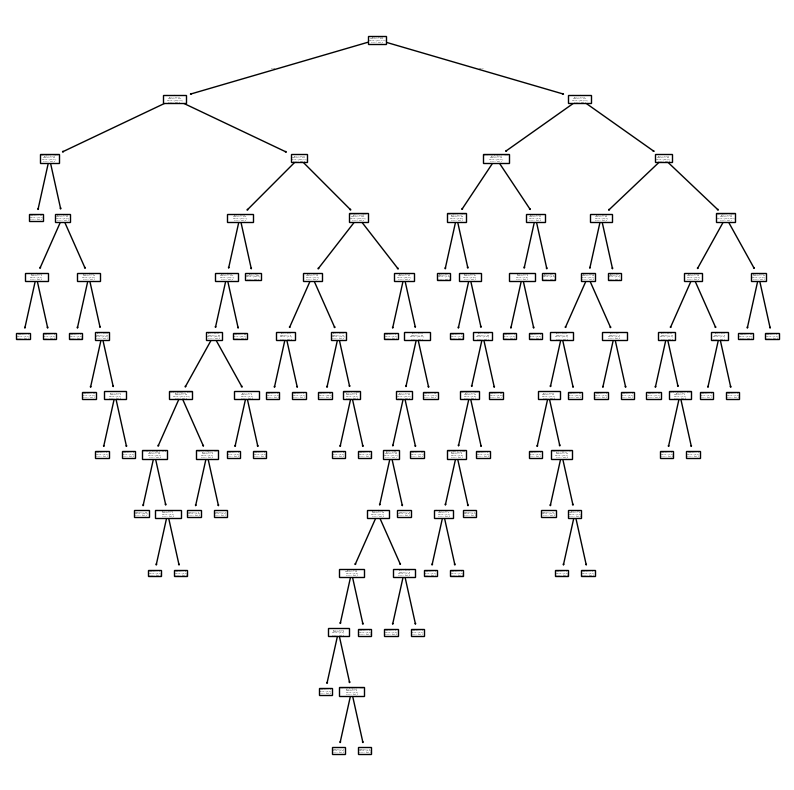

In [ ]:
from sklearn.tree import DecisionTreeClassifier

################## Clasificador ######################
clasificadorArbol = DecisionTreeClassifier()

################## Modelo ###########################
modeloArbol = clasificadorArbol.fit(entrenamientoDatos, entrenamientoClase)
predictArbol=modeloArbol.predict(evaluacionDatos)


reporte=classification_report(evaluacionClase,predictArbol,labels=clases)#output_dict=True)
print(reporte)

plt.figure(figsize=(10,10))
tree.plot_tree(clasificadorArbol,feature_names=nombresAtributos,class_names=clases)
plt.show()

##K-nn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #permite utilizar el clasificador K-nn

#1. Datos del modelo
clasificadorKnn=KNeighborsClassifier(n_neighbors=5) #Por defecto distancia euclideana y k=5


################## Modelo ###########################
modeloKnn = clasificadorKnn.fit(entrenamientoDatos, entrenamientoClase)
predictKnn=modeloKnn.predict(evaluacionDatos)


reporte=classification_report(evaluacionClase,predictKnn,labels=clases)#output_dict=True)
print(reporte)


              precision    recall  f1-score   support

       Cat_5       0.86      0.93      0.90       204
       Cat_7       0.68      0.50      0.58        60

    accuracy                           0.83       264
   macro avg       0.77      0.72      0.74       264
weighted avg       0.82      0.83      0.82       264



##Sistema de voto

In [ ]:
from sklearn.ensemble import VotingClassifier
Vecinos=KNeighborsClassifier(n_neighbors=5)
Arbol=DecisionTreeClassifier(max_depth=7)
Bosque=RandomForestClassifier(n_estimators=80, criterion='entropy')

#Ensamble
#voting: soft(probabilidades) , hard (conteo)
#SVM (Super Vector Machine) solo funciona con tipo hard (no calcula probabilidadeds de clase)
clasificadorVoto= VotingClassifier(estimators=[('Vecinos',Vecinos),('Arbol',Arbol),('Bosque',Bosque)], \
                                   voting= 'hard')


###### MODELO
modeloVoto=clasificadorVoto.fit(entrenamientoDatos, entrenamientoClase)
predictVoto=modeloVoto.predict(evaluacionDatos)

reporte=classification_report(evaluacionClase,predictVoto, labels=clases) #output_dict=True)
print(reporte)

              precision    recall  f1-score   support

       Cat_5       0.92      0.96      0.94       204
       Cat_7       0.85      0.73      0.79        60

    accuracy                           0.91       264
   macro avg       0.89      0.85      0.86       264
weighted avg       0.91      0.91      0.91       264



#ROC

In [ ]:
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import RocCurveDisplay

################## Clasificador ######################
clasificadorArbol = DecisionTreeClassifier()

################## Modelo ###########################
modeloArbol = clasificadorArbol.fit(entrenamientoDatos, entrenamientoClase)
predictArbol=modeloArbol.predict(evaluacionDatos)

reporte=classification_report(evaluacionClase,predictForest,labels=clases)#output_dict=True)
print(reporte)


predictionProbArbol = modeloArbol.predict_proba(evaluacionDatos)#Retorna la probabilidad de que la instancia pertenezca a una clase

print(roc_auc_score(evaluacionClase, predictionProbArbol[:,1]))
print(roc_auc_score(evaluacionClase, predictionProbArbol[:,0]))



              precision    recall  f1-score   support

       Cat_5       0.94      0.97      0.96       204
       Cat_7       0.89      0.80      0.84        60

    accuracy                           0.93       264
   macro avg       0.92      0.89      0.90       264
weighted avg       0.93      0.93      0.93       264

0.8563725490196078
0.14362745098039217


# Redes Neuronales

Seleccionar una métrica (para una o ambas clases) y encontrar la combinación de parámetros que da un mayor resultado

In [47]:
from sklearn.neural_network import MLPClassifier
################## Clasificador ######################
clasificadorRedes = MLPClassifier(hidden_layer_sizes=(9, 10), activation="logistic", max_iter=500, learning_rate_init=0.03)

#hidden_layer_sizes=(3, 3),
#random_state=1,
#activation="logistic" ‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
#max_iter=500 #Epocas
#learning_rate_initfloat, default=0.001 learning rate


################## Modelo ###########################
modeloRedes = clasificadorRedes.fit(entrenamientoDatos, entrenamientoClase)
predictRedes=modeloRedes.predict(evaluacionDatos)

reporte=classification_report(evaluacionClase,predictRedes,labels=clases)#,output_dict=True)
print(reporte)

              precision    recall  f1-score   support

       Cat_5       0.91      0.94      0.92       204
       Cat_7       0.75      0.67      0.71        60

    accuracy                           0.88       264
   macro avg       0.83      0.80      0.81       264
weighted avg       0.87      0.88      0.87       264



In [ ]:
%%shell
jupyter nbconvert --to html 4_2_5_SVMRandom

[NbConvertApp] Converting notebook 4_2_5_SVMRandom.ipynb to html
[NbConvertApp] Writing 921740 bytes to 4_2_5_SVMRandom.html
